In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating dataframe
url  = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
df = pd.read_csv(url)

In [4]:
# Top 5 rows of dataframe
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
df.shape

(200, 2)

In [6]:
df.isnull().sum().reset_index(name="count")

,index,count
0,TV,0
1,Sales,0


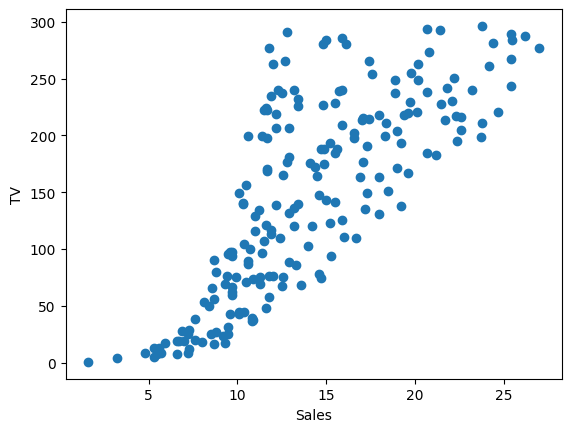

In [7]:
# scatter plot between sales and tv
# plt.scatter(x-df, y-df)
plt.scatter(df["Sales"], df["TV"])
plt.xlabel("Sales")
plt.ylabel("TV")
plt.show()

In [8]:
# correlation
df.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


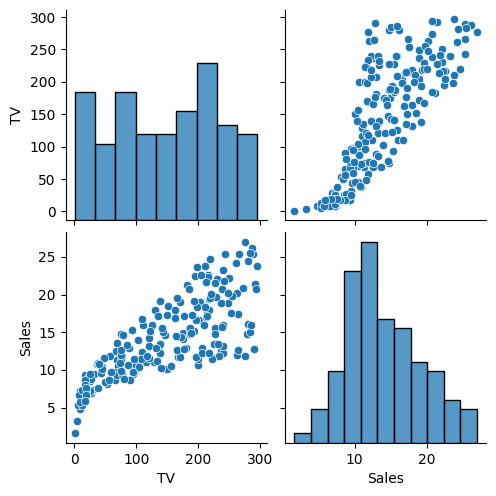

In [9]:
# seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [10]:
# divide feature into Independent and Dependent features
X=df[["TV"]]  # Independent feature must be a dataframe always
X.shape

(200, 1)

In [11]:
Y=df["Sales"]  # It can be series or dataframe or 1d array

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Apply Linear regression
from sklearn.linear_model import LinearRegression

In [17]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [18]:
# Printing coefficient and regression
print("Regression coefficient : ",regression.coef_)
print("Regression intercept : ",regression.intercept_)

Regression coefficient :  [3.97732877]
Regression intercept :  14.30466666666667


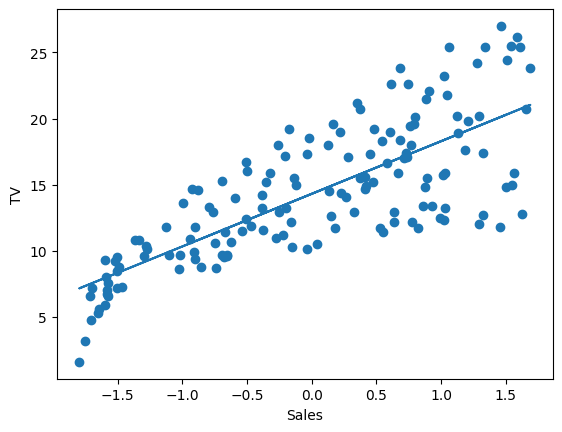

In [32]:
# printing training data plot and best fit line
plt.scatter(X_train,Y_train)
plt.xlabel("Sales")
plt.ylabel("TV")
plt.plot(X_train, regression.predict(X_train))
plt.show()

In [33]:
# Prediction for the test data
Y_predict = regression.predict(X_test)

In [34]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ",rmse)

Mean Squared Error :  9.179298570399792
Mean Absolute Error :  2.273770594370873
Root Mean Squared Error :  3.029735726164873


In [36]:
# R-square
from sklearn.metrics import r2_score

In [37]:
r_sq = r2_score(Y_test, Y_predict)
print("R- Square : ",r_sq)

R- Square :  0.6606120390330492


In [38]:
# Adjusted R-square
adj_r_sq = 1-(1-r_sq)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted r-square : ", adj_r_sq)

Adjusted r-square :  0.6535414565129043


In [40]:
# Linear Regression using OLS
import statsmodels.api as sm

In [41]:
model = sm.OLS(Y_train,X_train).fit()

In [42]:
prediction = model.predict(X_test)
print(prediction)

[ 0.48498246  1.99029449  6.56250392 -6.62421703  3.15796644 -3.65110853
  2.99383584 -4.82815937  3.25644479  1.03833704 -5.6957068  -4.53741375
  3.82386771 -6.9196521  -0.63110559  0.80855421 -6.83055263  2.09346229
 -3.64172964  3.95986163  3.58939543 -3.99343806 -5.39089284  4.59293678
 -3.93716471 -4.66402878  2.83908414 -0.64048448 -3.08368562 -6.77896873
  2.1966301  -3.92778582  2.15442509 -6.38036586  5.99039156  3.9973772
 -4.90787995  5.66213037 -1.67685195 -5.88328463 -1.73312529  1.1274365
 -5.15173112 -4.25135757  3.33147592 -5.38151395 -3.86213359 -0.26532883
 -2.26772209 -3.59483519]


In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.068
Model:                            OLS   Adj. R-squared (uncentered):              0.062
Method:                 Least Squares   F-statistic:                              10.93
Date:                Thu, 22 Aug 2024   Prob (F-statistic):                     0.00118
Time:                        12:26:39   Log-Likelihood:                         -615.84
No. Observations:                 150   AIC:                                      1234.
Df Residuals:                     149   BIC:                                      1237.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------